### Data Analytics Project
#### Objectives:
•	Apply your programing skills on real datasets.

•	Develop skills to clean and ready datasets for machine learning models.

•	Develop skills to explore datasets and define the best strategy to extract useful insights.

### Evaluation points: 
•	The quality of the coding (25% of the grade)

•	The quality of the report (25% of the grade)

•	The quality and consistency of the approach (50% of the grade)

•	The whole project will account for 60% of the overall Data Analytics class.

## Requirements:

### The report contains:

•	Give your project a context- Story telling.

•	A detailed description of the variables originally present in the dataset

o	How many observations per variable?

o	How many missing values? Express it in percentage of the total observations

o	What type of variable?

o	How many duplicates are present?

o	What are the unique values present per variable?

o	What are the frequencies of each unique observation? (when applicable)

o	What are the statistical properties of each variable?

•	Formulate a problem statement about the dataset.

o	What do you intend to do with the dataset? 

o	Is it a regression type of analysis?

o	Is it a classification type analysis?

o	Both types can be applied to the same dataset

•	A detailed strategy of selecting the variables. 

o	Why did you keep some variables?

o	Why did you eliminate some variables?

o	How and why did you decide to fill the missing values in some variables?

o	How and why did you decide to handle the duplicates?

o	How and why did you decide to apply a certain approach to handle extreme values?

•	Choose at least five graphics to represent best your data and strategy.

o	Each graphic should have a title and comments attached to it.

o	Graphics can either show the relationship between variables or between many variables or the statistical properties of the target variable.

### Basic statistics

o	Run tests to show what variables are linked?

o	Run test to find out the type of links between your variables?

### Basic analysis 
o	First steps for a regression/classification model

### Elements to return:

•	A report in Word or PDF format.

•	An ipynb file with your code commented and structured.

### Warnings:

•	ChatGPT is not prohibited but should NOT be used extensively.

•	This is an original work and NOT a duplicate of existing projects on the same database.

•	Any proven breach of the rules can lead to a null mark for the project among other sanctions.


# Loading the required libraries

In [1]:

#Loading the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

# Loading the datasets

In [2]:
data = pd.read_csv('water_dataX.csv.xls',sep = ",", encoding='latin')

### Basic Checks in the dataset

In [3]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
data.tail()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003
1990,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29,7.6,110,5.7,1.1,NAN,NAN,546,2003


In [5]:
data.shape

(1991, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [7]:
data.columns

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'D.O. (mg/l)', 'PH',
       'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)',
       'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)',
       'TOTAL COLIFORM (MPN/100ml)Mean', 'year'],
      dtype='object')

# DOMAIN KNOWLEDGE


### task  10

• Formulate a problem statement about the dataset.


## Problem Statement:

Understanding the Temporal and Geographical Variations in Water Quality Parameters and Evaluating Water Pollution Contributing Factors.


### task 1
Give your project a context- Story telling.

### Background

In the year 2023, a team of environmental scientists embarked on a mission to analyze water quality data collected from various monitoring stations across the States. The data spanned five years, from 2002 to 2016, and included measurements of key water quality parameters such as temperature, dissolved oxygen, pH, conductivity, biochemical oxygen demand, nitrate and nitrite nitrogen, fecal coliform bacteria, and total coliform bacteria.

The scientists were particularly interested in understanding the spatial and temporal variations in water quality across different regions and station types. They hoped to identify potential pollution sources, assess the overall health of aquatic ecosystems, and ultimately inform strategies for water quality management and protection.


### task 2

 A detailed description of the variables originally present in the dataset


### Feature Explanation

1. **STATION CODE**:
   - This feature represents a unique identifier assigned to each monitoring station where water quality measurements are taken. Each code corresponds to a specific sampling point.

2. **LOCATIONS**:
   - This feature contains the names of the locations where water samples are collected for quality assessment. It provides information about the specific places where the water quality measurements are recorded.

3. **STATE**:
   - This feature denotes the state where the monitoring station is situated. It indicates the geographical division or state within the country.

4. **Temp**:
   - This feature represents the water temperature measured at the sampling point. It indicates the degree of hotness or coldness of the water at the time of measurement.

5. **D.O. (mg/l)** (Dissolved Oxygen):
   - This feature represents the concentration of dissolved oxygen in the water, typically measured in milligrams per liter (mg/l). Dissolved oxygen is crucial for aquatic organisms and serves as an indicator of water quality.

6. **PH**:
   - pH is a measure of the acidity or alkalinity of the water. It indicates the hydrogen ion concentration and is measured on a scale of 0 to 14. A pH of 7 is considered neutral, while values below 7 are acidic and above 7 are alkaline.

7. **CONDUCTIVITY (µmhos/cm)**:
   - Conductivity is a measure of water's ability to conduct an electrical current. It is influenced by the presence of dissolved solids and ions. Conductivity is measured in microsiemens per centimeter (µS/cm) or micromhos per centimeter (µmhos/cm).

8. **B.O.D. (mg/l)** (Biochemical Oxygen Demand):
   - B.O.D. represents Biochemical Oxygen Demand, which measures the amount of dissolved oxygen required by microorganisms to break down organic matter in water. It is measured in milligrams per liter (mg/l).

9. **NITRATENAN N+ NITRITENANN (mg/l)**:
   - This feature may represent the combined concentration of nitrate and nitrite in water, measured in milligrams per liter (mg/l). Nitrate and nitrite are forms of nitrogen compounds and can be indicators of water pollution.

10. **FECAL COLIFORM (MPN/100ml)**:
    - Fecal coliform is a type of bacteria found in the feces of warm-blooded animals. Its presence in water indicates contamination by fecal matter. The concentration is typically measured in Most Probable Number per 100 milliliters (MPN/100ml).

11. **TOTAL COLIFORM (MPN/100ml)Mean**:
    - Total coliform represents a group of bacteria, including fecal coliform, found in the environment. It's an indicator of overall water quality. The concentration is measured in Most Probable Number per 100 milliliters (MPN/100ml).

12. **year**:
    - This feature denotes the year in which the water quality measurements were recorded. It indicates the temporal aspect or the year of the observation for the corresponding water quality data.



### task 3

How many observations per variable?


In [8]:
data.shape

(1991, 12)

We have a total of 1991 observations per variables with 12 features

# DATA PREPROCESSING

In [9]:
# Checking for datatypes of the dataset
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [10]:
# Changing column names
data = data.rename(columns={"D.O. (mg/l)": "DO", "CONDUCTIVITY (µmhos/cm)": "Conductivity", "B.O.D. (mg/l)": "BOD", "NITRATENAN N+ NITRITENANN (mg/l)": "NI", "FECAL COLIFORM (MPN/100ml)": "Fec_col", "TOTAL COLIFORM (MPN/100ml)Mean": "Tot_col"})

In [11]:
data.columns

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'DO', 'PH',
       'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'year'],
      dtype='object')

In [12]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [13]:
# Converting object data type to numeric
def convert_to_numeric(data):
    num_col = data.shape[1]
    # Start from index 3
    for index in range(3, num_col):
        col_name = data.iloc[:, index].name
        data[col_name] = pd.to_numeric(data[col_name], errors="coerce")
    return data

data = convert_to_numeric(data)
data.dtypes


STATION CODE     object
LOCATIONS        object
STATE            object
Temp            float64
DO              float64
PH              float64
Conductivity    float64
BOD             float64
NI              float64
Fec_col         float64
Tot_col         float64
year              int64
dtype: object

### task 4

How many missing values? Express it in percentage of the total observations

In [14]:
# Checking for missing values
data.isnull().sum()

STATION CODE      0
LOCATIONS         0
STATE             0
Temp             92
DO               31
PH                8
Conductivity     25
BOD              43
NI              225
Fec_col         316
Tot_col         132
year              0
dtype: int64

In [15]:
# Replacing string NAN values with actual NAN value (np.nan)
def convert_to_nan(data):
    n_col = data.shape[1]
    for index in range(n_col):
        data.iloc[:, index]  = data.iloc[:, index].replace("NAN", np.nan)
    return data

data = convert_to_nan(data)

In [16]:
# Checking for missing values
data.isnull().sum().sort_values()

year              0
PH                8
Conductivity     25
DO               31
BOD              43
Temp             92
STATION CODE    122
Tot_col         132
LOCATIONS       184
NI              225
Fec_col         316
STATE           761
dtype: int64

In [17]:
# Calculate percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a DataFrame to display columns and their respective missing value percentages
missing_df = pd.DataFrame({'Column_Name': data.columns, 'Missing_Percentage': missing_percentage})

# Display columns with their missing value percentages (sorted)
print(missing_df.sort_values(by='Missing_Percentage', ascending=False))

               Column_Name  Missing_Percentage
STATE                STATE           38.221999
Fec_col            Fec_col           15.871421
NI                      NI           11.300854
LOCATIONS        LOCATIONS            9.241587
Tot_col            Tot_col            6.629834
STATION CODE  STATION CODE            6.127574
Temp                  Temp            4.620794
BOD                    BOD            2.159719
DO                      DO            1.557007
Conductivity  Conductivity            1.255650
PH                      PH            0.401808
year                  year            0.000000


We had about 11 features with missing values, The above shows the percentage representative of each features making state the highest with over 38.221999

### task 5

What type of variable ?

The following are type of variables with missing values values

**STATE**                
**Fec_col**           
**NI**                     
**LOCATIONS**      
**Tot_col**           
**STATION CODE**  
**Temp**                 
**BOD**                   
**DO**                     
**Conductivity**  
**PH** 

Excluding

**year**      

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
# Replacing NULL values with median of column
# Selecting numeric data
data_num = data.select_dtypes(exclude="object")
data_num_cols = data_num.columns


In [20]:
data_num_col = list(data_num_cols)

print(data_num_col)

['Temp', 'DO', 'PH', 'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'year']


In [21]:
data_num_col = data[data_num_col]
data_num_col

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
0,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...
1986,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


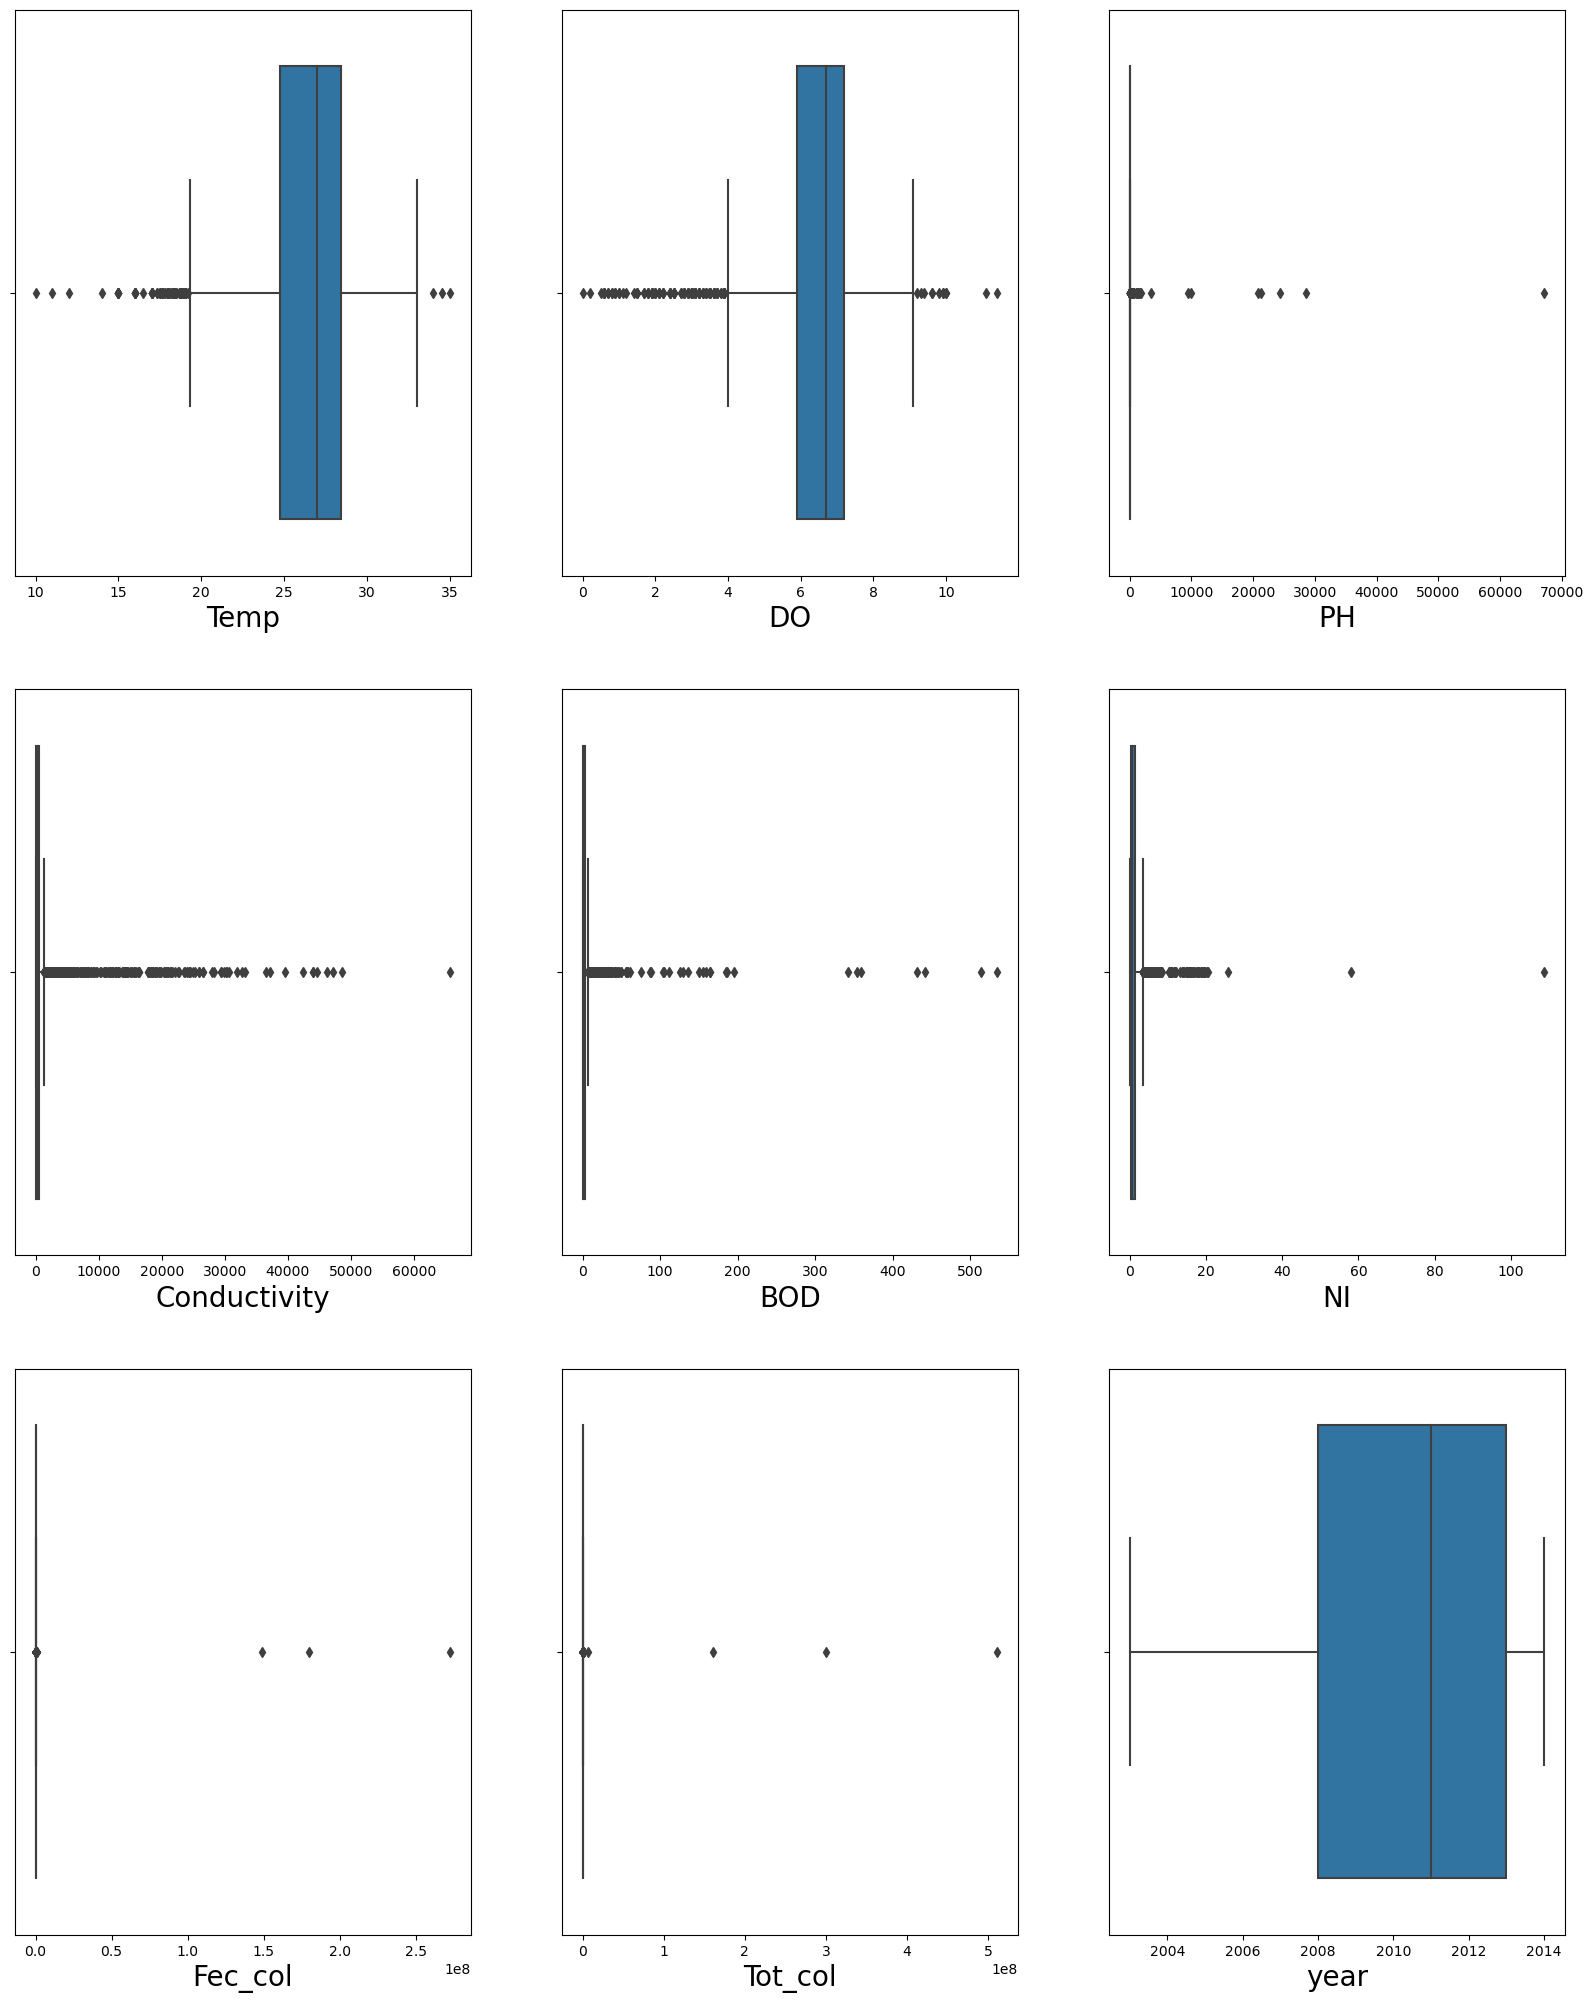

In [22]:
# let's see how data is distributed for every continious data point
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_num_col:
    if plotnumber<=9 :     # as there are  columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x= data_num_col[column],data=data)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [23]:
imputer = SimpleImputer(strategy="median")

data_num = imputer.fit_transform(data_num)
data_num = pd.DataFrame(data_num, columns=data_num_cols)

In [24]:
# Filling Categorical missing values
data_cat = data.select_dtypes(include="object")
data_cat.isnull().sum()

STATION CODE    122
LOCATIONS       184
STATE           761
dtype: int64

In [25]:
# Here we can fill these values by obeserving other attributes
# Example - 
pd.set_option('mode.chained_assignment', None)
data_cat_copy = data_cat.copy()

data_cat_copy[data_cat_copy["STATION CODE"] == "1330"]
# Station Code with value 1330 will have Location - TAMBIRAPARANI which belongs in STATE - TAMIL NADU
# I can replace all the NAN occurences in STATE with TAMILNADU
data_cat_copy["STATE"][data_cat_copy["STATION CODE"] == "1330"] = data_cat_copy["STATE"][data_cat_copy["STATION CODE"] == "1330"].fillna("TAMILNADU")

data_cat_copy[data_cat_copy["STATION CODE"] == "1330"]



,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [26]:
# The NULL values in LOCATION attribute are in STATE attribute (ex - above dataframe)
# So, I will fill the NULL values in LOCATION attribute with the corresponding STATE value
# And, the state value will be replaced by the function "fill_state" defined below this cell

def fill_locations(data_cat):
    location_null = data_cat[data_cat["LOCATIONS"].isnull()]
    location_null_indices = location_null.index
    for index in location_null_indices:
        state_value = location_null["STATE"][index]
        location_null["LOCATIONS"][index] = state_value
        location_null["STATE"][index] = np.nan
    data_cat[data_cat["LOCATIONS"].isnull()] = location_null
    return

fill_locations(data_cat_copy)
data_cat_copy[data_cat_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [27]:
data_cat_copy[data_cat_copy["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [28]:
# Now I can fill NULL values of Station code with corresponding LOCATION value(ex - above dataframe)
# I will match the corresponding LOCATION value with other same LOCATION value and insert the value of station code

def fill_code(data_cat):
    station_null = data_cat[data_cat["STATION CODE"].isnull()]
    station_null_indices = station_null.index
    for index in station_null_indices:
        stat_code = np.nan
        location_index = station_null["LOCATIONS"][index]
        code_at_location = data_cat["STATION CODE"][data_cat["LOCATIONS"] == location_index]
        for index_code in code_at_location.index:
            if (code_at_location[index_code] != np.nan):
                stat_code = code_at_location[index_code]
                break
        station_null["STATION CODE"][index] = stat_code
    data_cat[data_cat["STATION CODE"].isnull()] = station_null
    return

fill_code(data_cat_copy)
data_cat_copy[data_cat_copy["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [29]:
# Filling all state NAN values which have corresponding station code value
def fill_state(data_cat):
    station_code = data_cat["STATION CODE"].unique()
    for index in range(station_code.shape[0]):
        if (station_code[index] != np.nan):
            data_state = data_cat["STATE"][data_cat["STATION CODE"] == station_code[index]] 
            state_values = data_cat["STATE"][data_cat["STATION CODE"] == station_code[index]]
            state = np.nan
            for index_state in range(state_values.shape[0]):
                if (state_values.iloc[index_state] != np.nan):
                    state = state_values.iloc[index_state]
                    break
            data_state_fill = data_state.fillna(state) 
            data_cat["STATE"][data_cat["STATION CODE"] == station_code[index]] = data_state_fill
    return
fill_state(data_cat_copy)
data_cat_copy[data_cat_copy["STATION CODE"] == "1330"]


,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [30]:
data_cat_copy.isnull().sum()

STATION CODE     5
LOCATIONS        3
STATE           13
dtype: int64

In [31]:
data_cat_copy[data_cat_copy["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1106,1207,KABBANI AT MUTHANKARA,NaN
1107,1208,BHAVANI AT ELACHIVAZHY,NaN
1650,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1651,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1652,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1770,2047,NNANCHOE (ATTAWA CHOE),NaN
1771,2048,PATIALA KI RAO,NaN
1772,2049,SUKHNA CHOE,NaN


In [32]:
# The first location KABBANI AT MUTHANKARA is in STATE Kerela
data_cat_copy["STATE"][1106] = "KERALA"
data_cat_copy["STATE"][1107] = "KERALA"
data_cat_copy["STATE"][1650] = "CHANDIGARH"
data_cat_copy["STATE"][1651] = "CHANDIGARH"
data_cat_copy["STATE"][1652] = "CHANDIGARH"
data_cat_copy["STATE"][1770] = "CHANDIGARH"
data_cat_copy["STATE"][1771] = "CHANDIGARH"
data_cat_copy["STATE"][1772] = "CHANDIGARH"
data_cat_copy["STATE"][1784] = "DAMAN & DIU"
data_cat_copy["STATE"][1785] = "DAMAN & DIU"
data_cat_copy["STATION CODE"][1784] = "0000" # this is according to my discribtion 
data_cat_copy["STATION CODE"][1785] = "0000"

In [33]:
data_cat = data_cat_copy
data_cat.isnull().sum()

STATION CODE    3
LOCATIONS       3
STATE           3
dtype: int64

In [34]:
data_num.isnull().sum()

Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
year            0
dtype: int64

In [35]:
data_cat

,STATION CODE,LOCATIONS,STATE
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA
2,1475,ZUARI AT PANCHAWADI,GOA
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA
...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA


In [36]:
data_num

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
0,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0
1,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0
2,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0
3,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0
4,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...
1986,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0
1987,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0
1988,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0
1989,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0


In [37]:
data_final = pd.concat([data_cat, data_num], axis=1)
data_final.isnull().sum()

STATION CODE    3
LOCATIONS       3
STATE           3
Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
year            0
dtype: int64

In [38]:
# These are the samples which don't contain any attribute
# The filled attributes are median of corresponding columns
# So it is best to remove them
data_null = data_final[(data_final["STATION CODE"].isnull()) & (data_final["LOCATIONS"].isnull()) & (data_final["STATE"].isnull())]
data_null_indices = data_null.index
data_final.drop(data_null_indices, axis=0, inplace=True)
data_null

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
260,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2013.0
431,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2013.0
1912,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2003.0


In [39]:
data_final.isnull().sum()

STATION CODE    0
LOCATIONS       0
STATE           0
Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
year            0
dtype: int64

In [40]:
data_final.shape

(1988, 12)

The final dataset contains 1898 samples and 12 attributes

### task  6

How many duplicates are present?

In [41]:
# Check for duplicate rows
data_dup_rows = data_final[data_final.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(data_dup_rows.sum())
print(data_dup_rows)

Duplicate Rows:
STATION CODE    0.0
LOCATIONS       0.0
STATE           0.0
Temp            0.0
DO              0.0
PH              0.0
Conductivity    0.0
BOD             0.0
NI              0.0
Fec_col         0.0
Tot_col         0.0
year            0.0
dtype: float64
Empty DataFrame
Columns: [STATION CODE, LOCATIONS, STATE, Temp, DO, PH, Conductivity, BOD, NI, Fec_col, Tot_col, year]
Index: []


No Duplicates in the dataset

### task  7

 What are the unique values present per variable?

In [42]:
# Calculate the count of unique values per variable (column)
unique_values_count = data_final.nunique()

# Display the count of unique values per variable
print(unique_values_count)

STATION CODE     321
LOCATIONS        691
STATE             24
Temp             177
DO               165
PH               265
Conductivity    1004
BOD              407
NI               506
Fec_col          868
Tot_col         1093
year              12
dtype: int64


They above result display the unique values per variable in the datasets

### task  8
What are the frequencies of each unique observation? (when applicable)

 The frequencies of a unique observation can only be applicable when variable has a categorical data points

# Data Visualization

In [43]:
data_final

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0


In [44]:
data_clean = data_final.copy()

In [45]:
data_clean

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0


In [46]:
# Selecting numeric data for visualization
data_clean_num = data_clean.select_dtypes(exclude="object")
data_clean_num_cols = data_clean_num.columns

In [47]:
data_clean_num_cols

Index(['Temp', 'DO', 'PH', 'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col',
       'year'],
      dtype='object')

In [48]:
data_clean_num_cols = list(data_clean_num_cols)

print(data_clean_num_cols)

['Temp', 'DO', 'PH', 'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'year']


In [49]:
data_clean_num_cols = data_clean[data_clean_num_cols]
data_clean_num_cols

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
0,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0
1,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0
2,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0
3,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0
4,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...
1986,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0
1987,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0
1988,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0
1989,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0


### Data Visualization to see how the data are distrributed for continious dataset

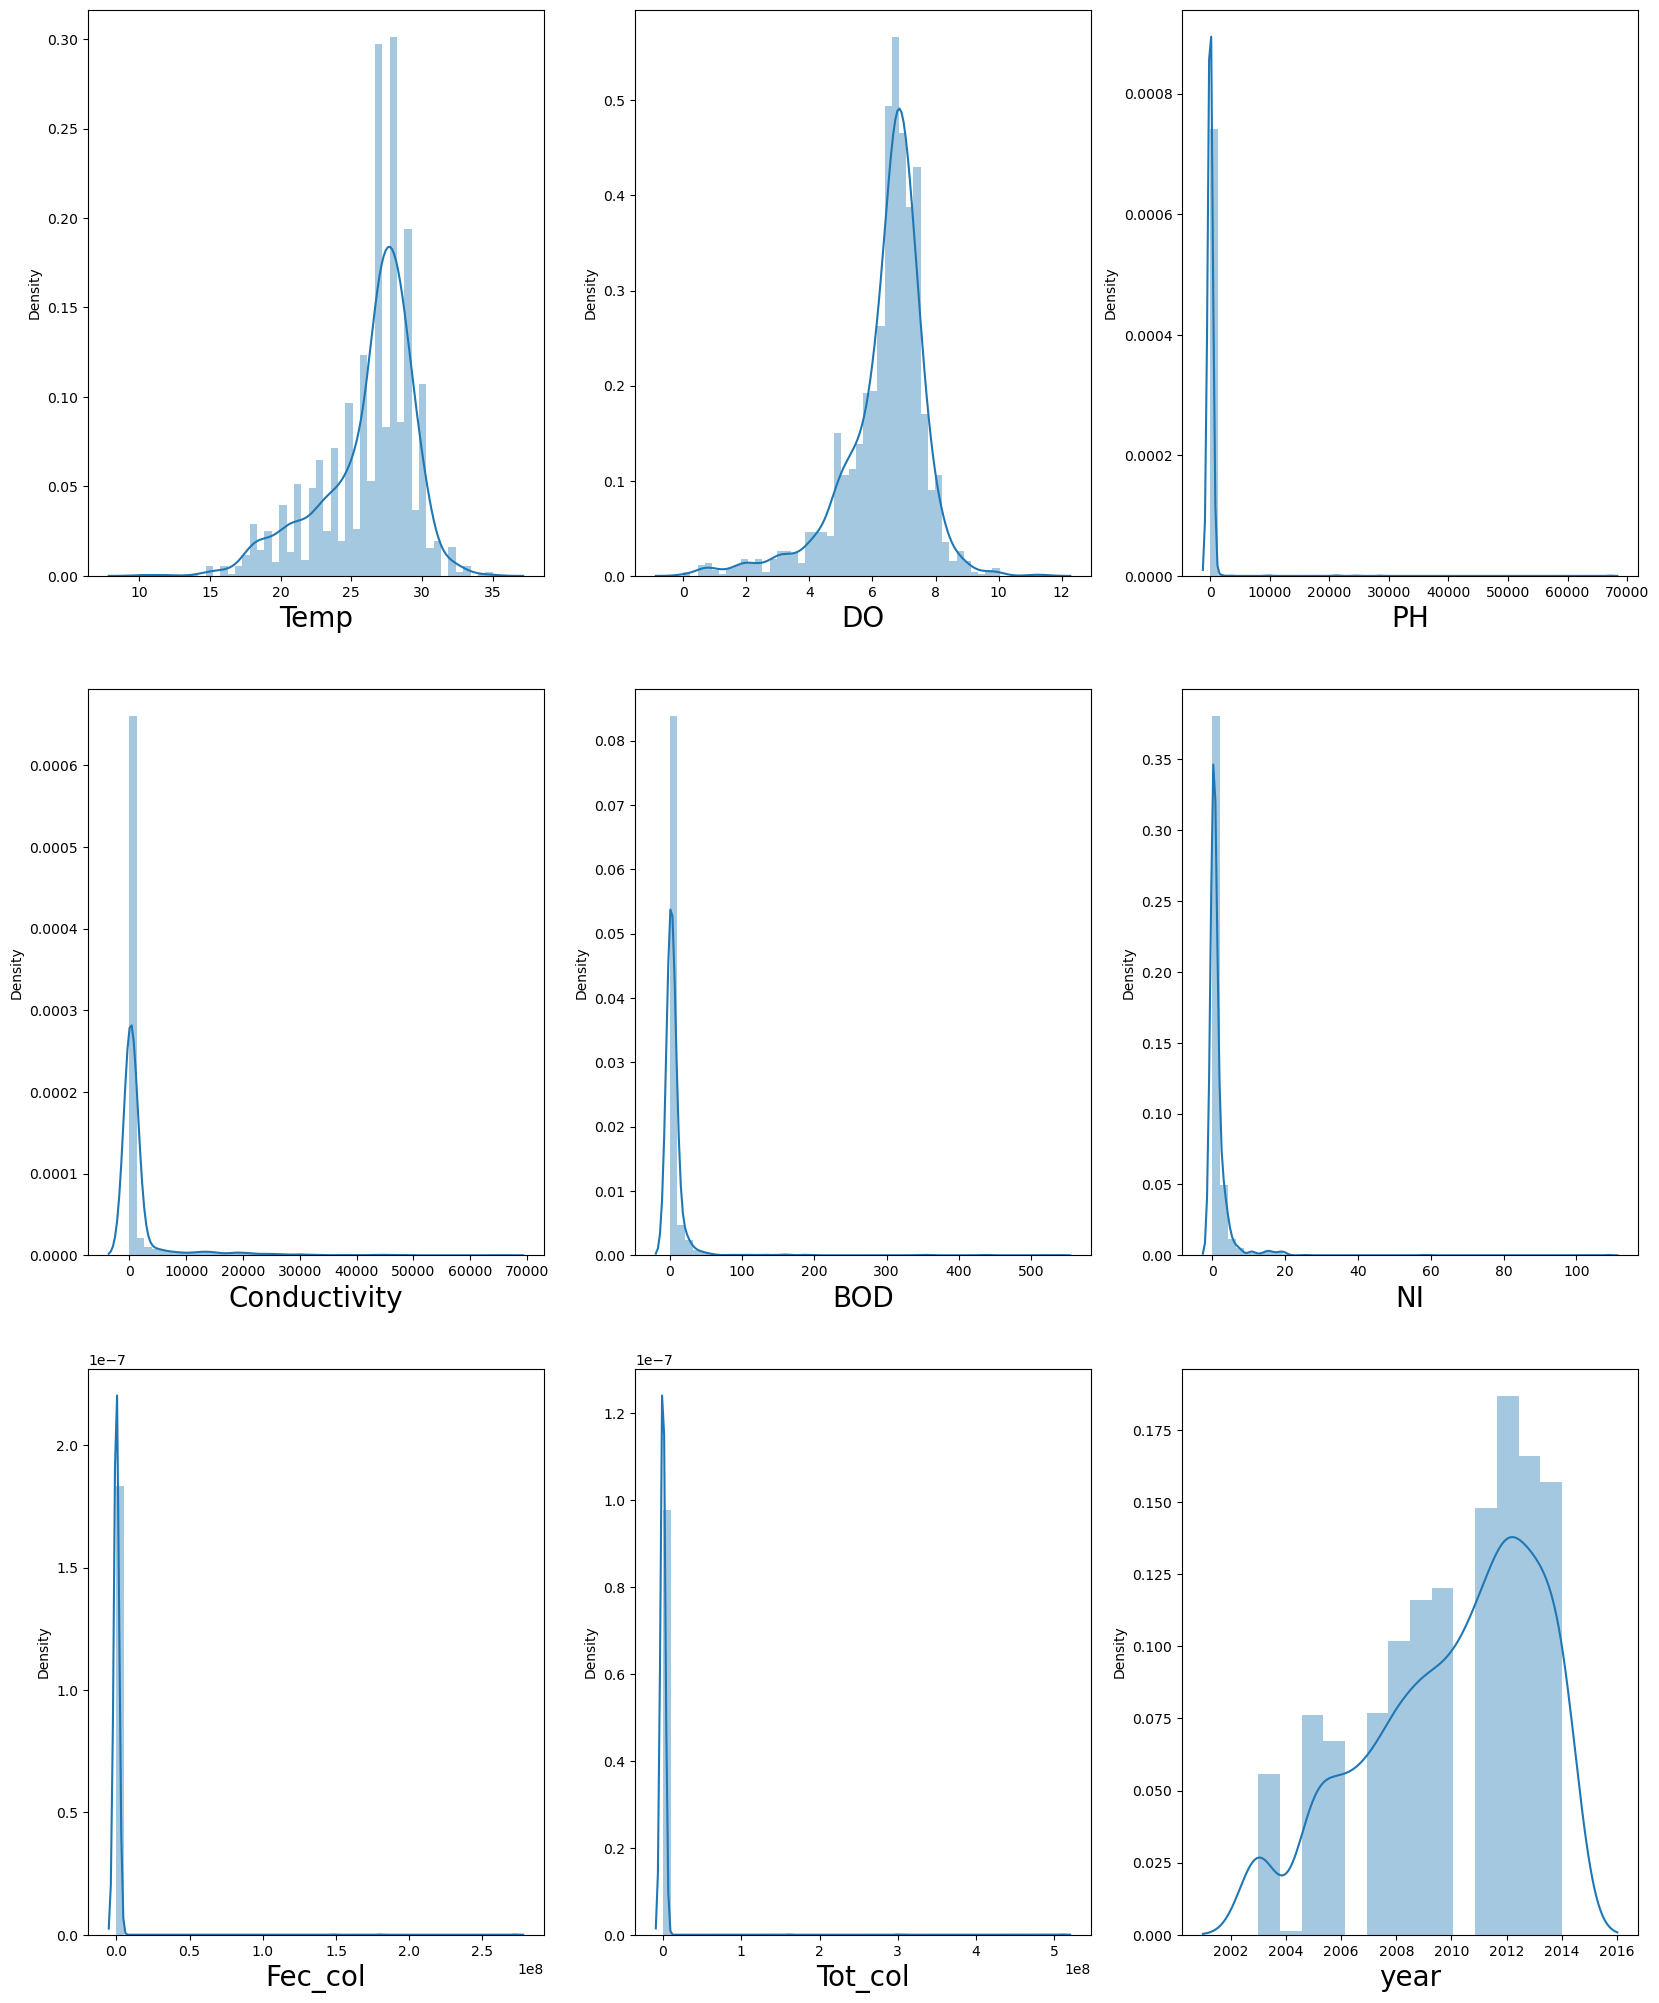

In [50]:
# let's see how data is distributed for every continious data point
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_clean_num_cols:
    if plotnumber<=9 :     # as there are 10 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_clean_num_cols[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

### Data Visualization to see how the data are distrributed for Categorical dataset

In [51]:
data_clean_cat = data_clean.select_dtypes(include="object")
data_clean_cat

,STATION CODE,LOCATIONS,STATE
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA
2,1475,ZUARI AT PANCHAWADI,GOA
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA
...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA


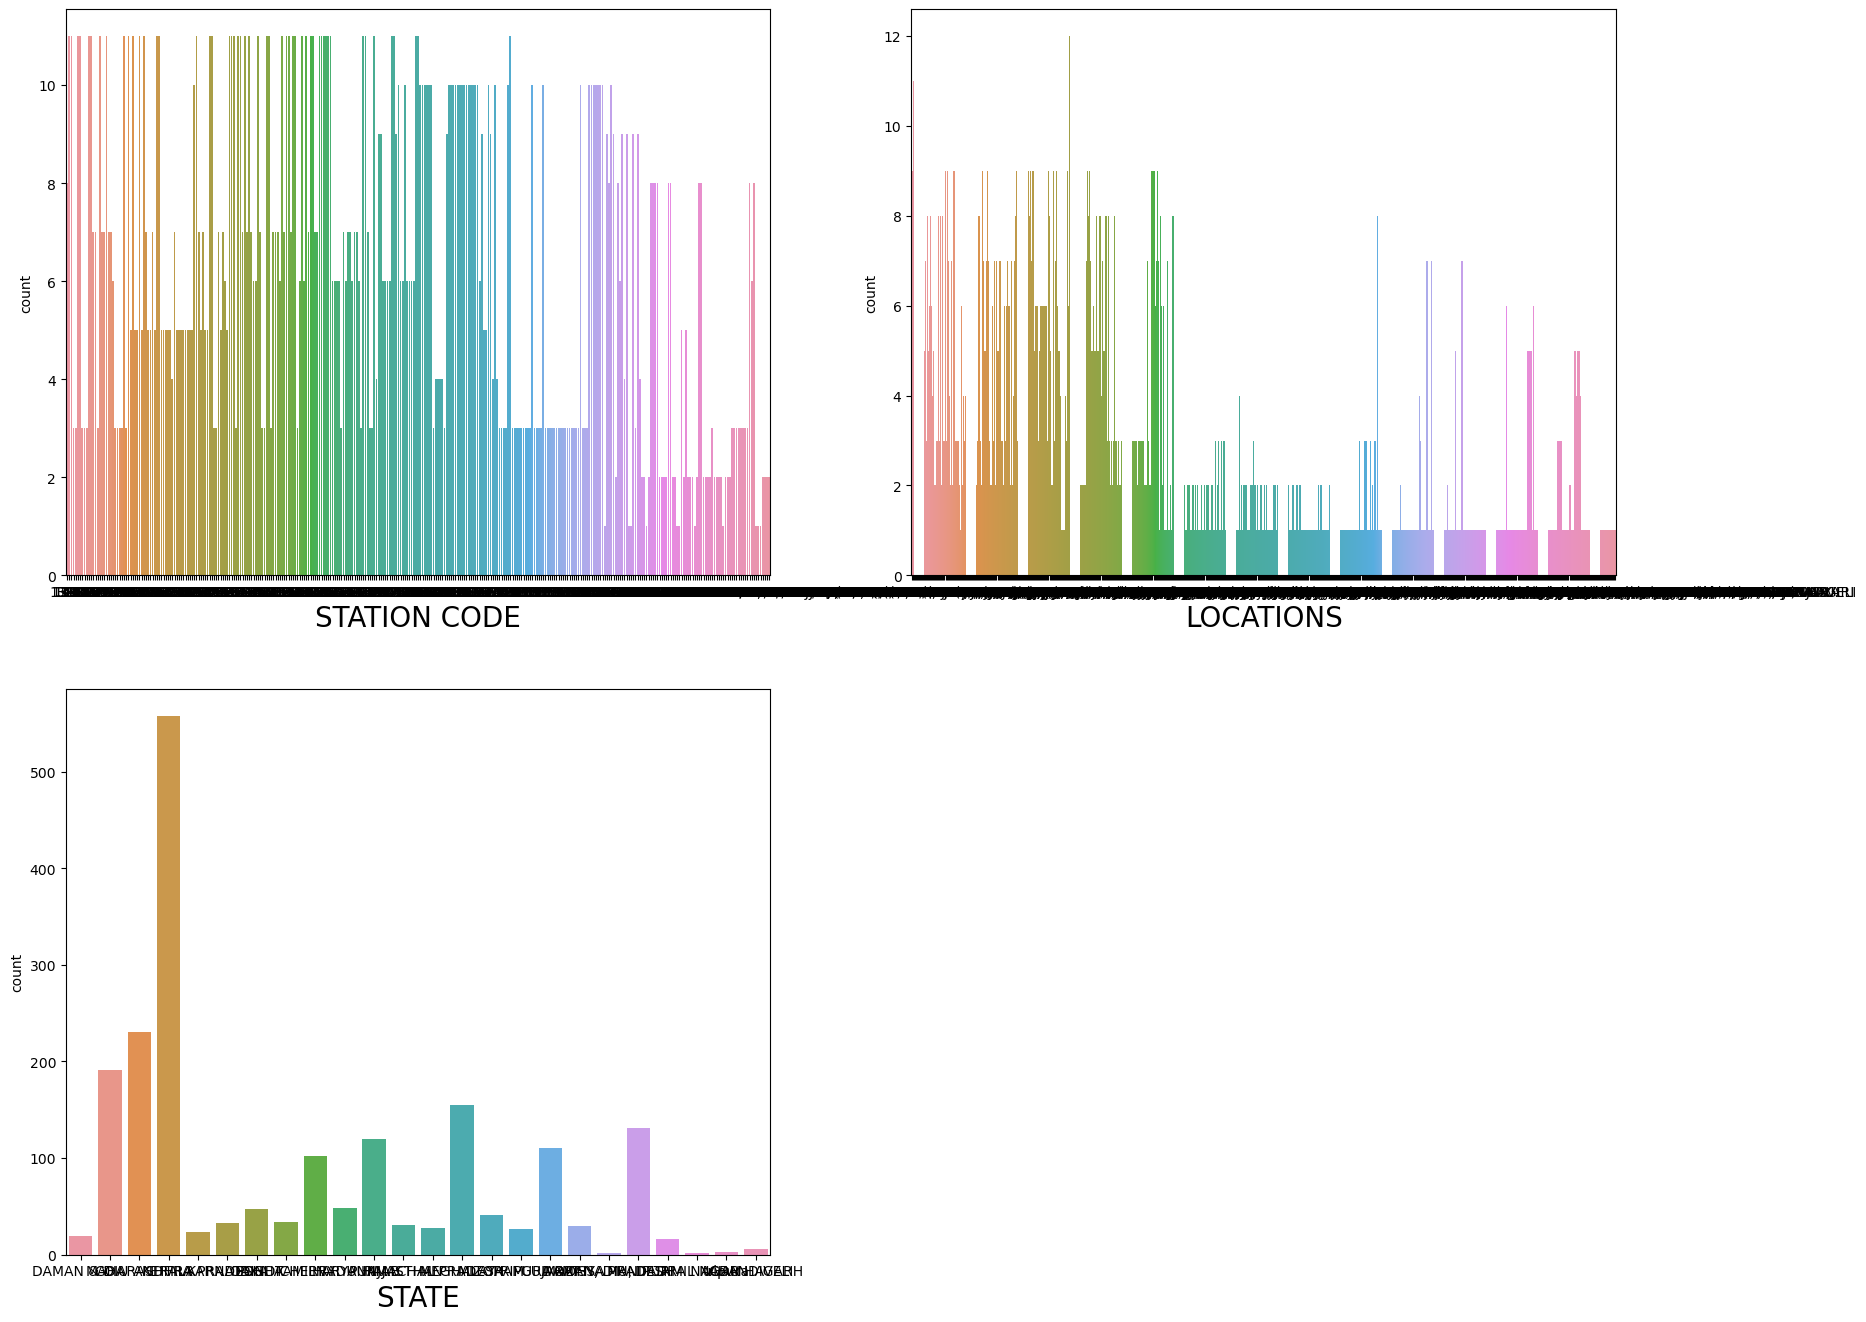

In [52]:
# let's see how data is distributed for every continious data point
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_clean_cat:
    if plotnumber<=6 :     # as there are 10 columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(data_clean_cat[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

visualization of catego

In [53]:
data_clean.STATE

0       DAMAN & DIU
1               GOA
2               GOA
3               GOA
4               GOA
           ...     
1986      TAMILNADU
1987      TAMILNADU
1988        TRIPURA
1989        TRIPURA
1990        TRIPURA
Name: STATE, Length: 1988, dtype: object

In [54]:
data_clean.STATE.unique()

array(['DAMAN & DIU', 'GOA', 'MAHARASHTRA', 'KERALA', 'ANDHRA PRADESH',
       'KARNATAKA', 'ODISHA', 'PONDICHERRY', 'TAMILNADU', 'HARYANA',
       'PUNJAB', 'RAJASTHAN', 'HIMACHAL PRADESH', 'MEGHALAYA', 'MIZORAM',
       'TRIPURA', 'GUJARAT', 'ORISSA', 'MADHYA PRADESH', 'MANIPUR',
       'DAMAN, DIU, DADRA NAGAR HAVELI', 'TAMIL NADU', 'tripura',
       'CHANDIGARH'], dtype=object)

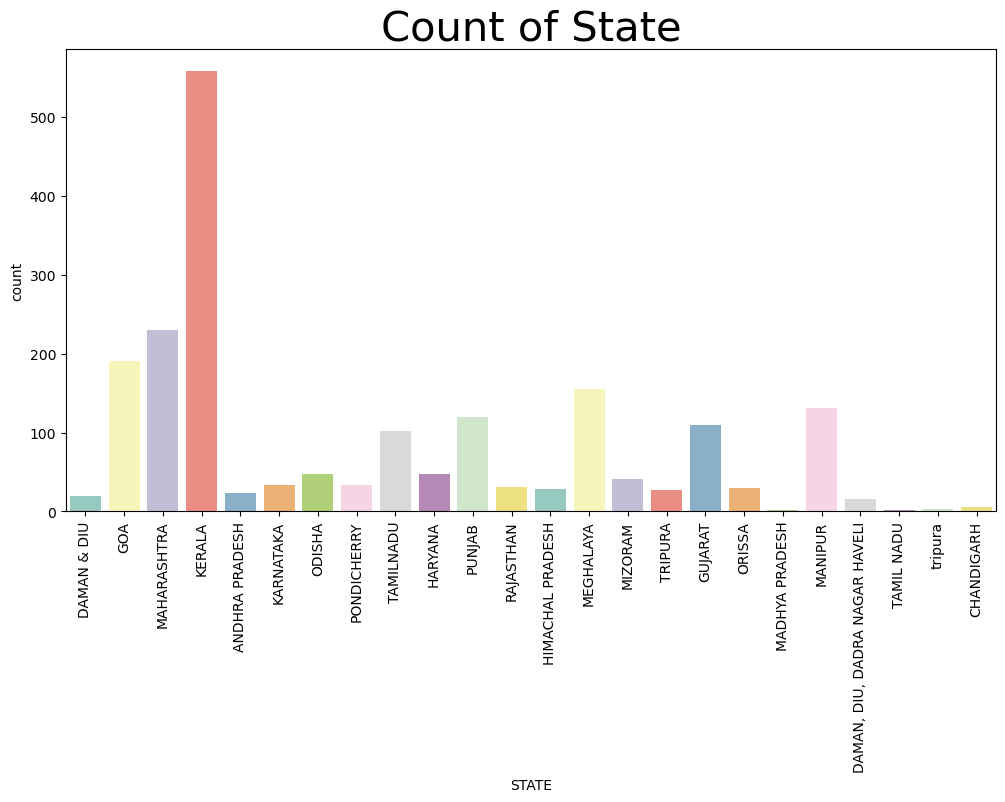

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data_clean.STATE, palette='Set3')
plt.title('Count of State', size=30)
plt.xticks(rotation=90)
plt.show()

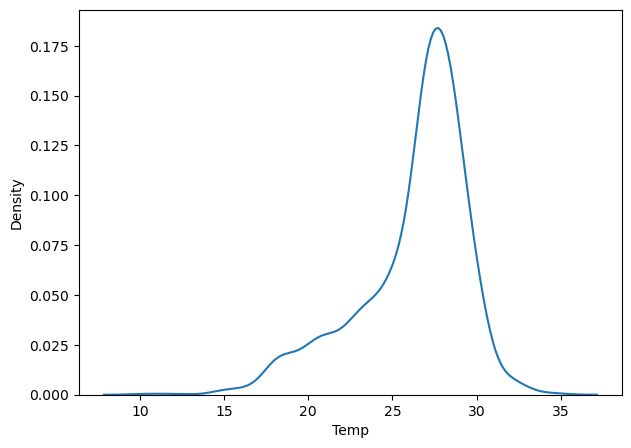

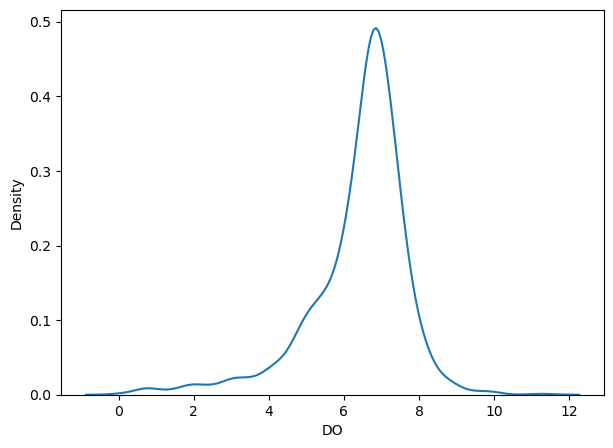

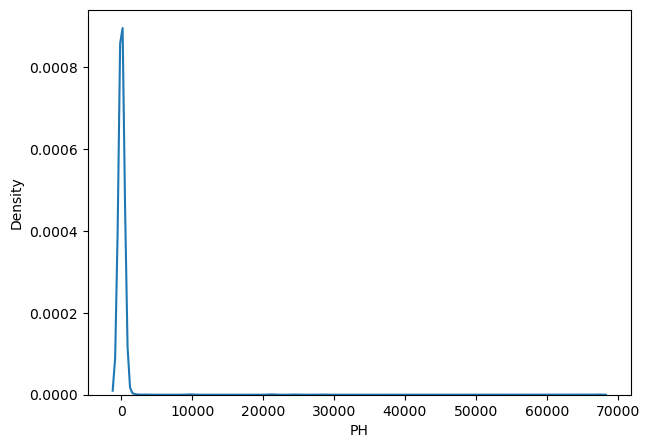

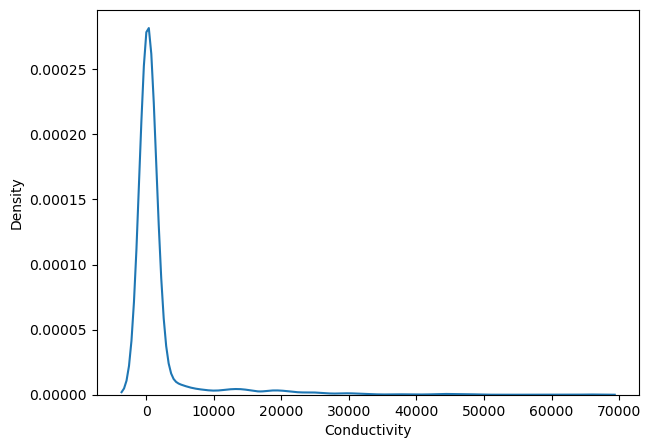

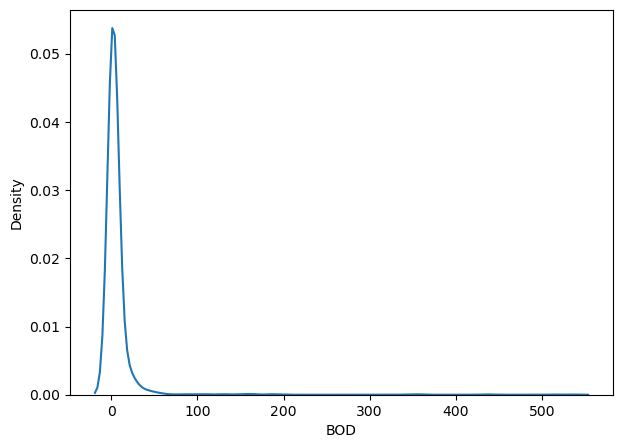

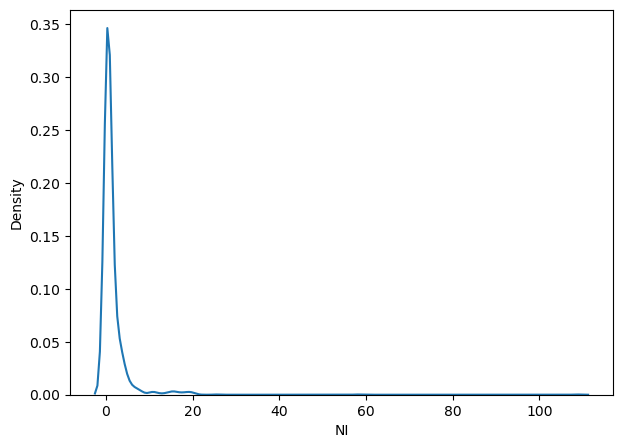

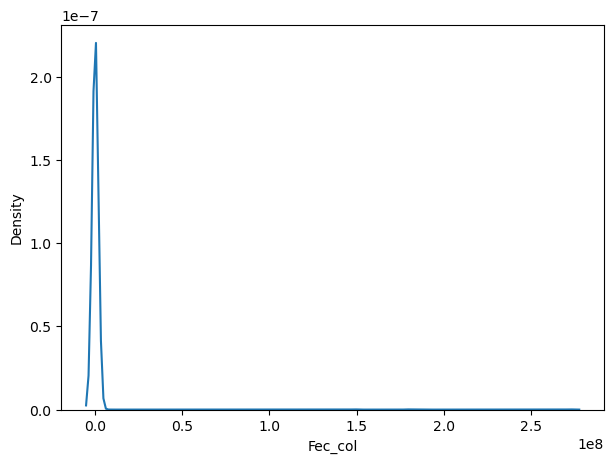

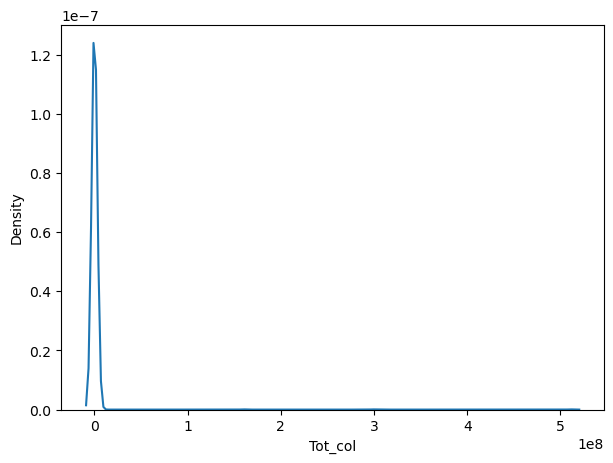

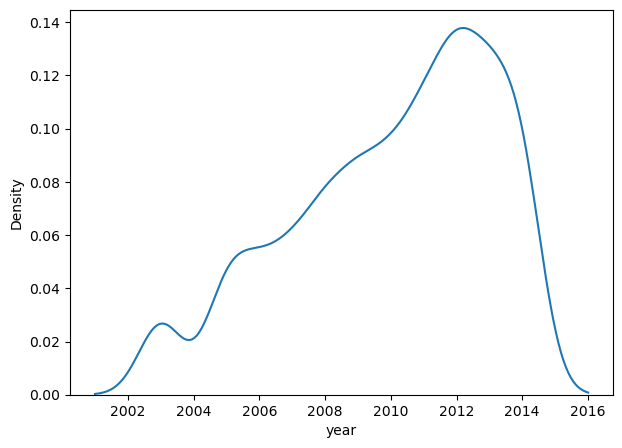

In [56]:
# PLotting PDFs of all the numeric attributes in the dataset

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(data_clean_num_cols)

In [57]:
# Here, almost all kde plots are Gaussian Like 
# Using Z-Score Normalization to detect outliers

data_num_final_norm = zscore(data_clean_num_cols, axis=0)


def indices_of_greater_than_3(data_norm):
    indices_arr = []
    n_col = data_norm.shape[1]
    for index in range(n_col):
        col_index = data_norm.iloc[: ,index]
        greater_than_3 = data_norm[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(data_num_final_norm)
print("Number of outliers using Z-Score method-",len(indices_arr))
data_clean.iloc[indices_arr, :]

Number of outliers using Z-Score method- 139


,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
741,2880,NAMBUL RIVER AT BISHNUPUR,MANIPUR,28.0,8.2,7.6,112.0,2.1,0.516,221.0,31.0,2012.0
745,2856,"THOUBAL RIVER AT YAIRIPOK, THOUBAL",MANIPUR,30.0,9.3,7.6,193.0,2.3,0.516,221.0,41.0,2012.0
1917,1862,RIVER KAVERI ON BRIDGE AT BILLIMORANANVALSAD ROAD,GUJARAT,29.0,8.1,467.0,7.1,3.0,0.516,221.0,107.0,2003.0
1924,1438,"MINDHOLA AT STATE HIGHWAY BRIDGE SACHIN, GUJARAT",GUJARAT,28.0,8.0,590.0,4.8,1.8,0.516,221.0,2873.0,2003.0
1925,1444,"KALI AT D/S WEST COAST PAPER MILL, KARNATAKA",KARNATAKA,27.0,7.7,440.0,6.5,2.4,0.900,0.9,688.0,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.000,1328.0,4975.0,2013.0
685,1023,GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA),PUNJAB,21.0,5.5,7.4,635.0,8.8,5.080,1400.0,5500.0,2012.0
172,3023,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUE...",TAMILNADU,24.3,0.9,7.6,2039.0,104.5,0.900,272521616.0,511090873.0,2014.0
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.000,1328.0,4975.0,2013.0


In [58]:
data_clean.drop(indices_arr, axis=0, inplace=True)
data_clean.shape

(1862, 12)

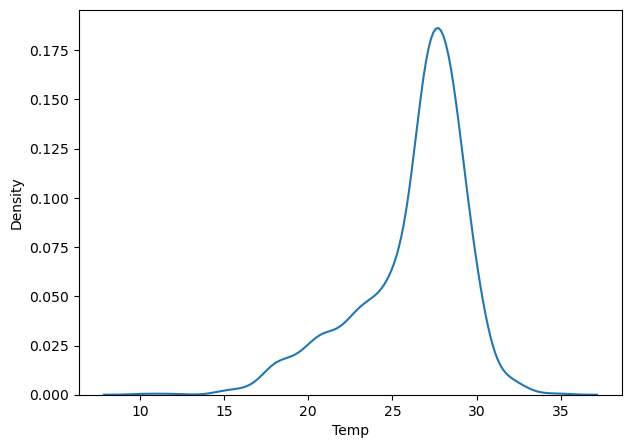

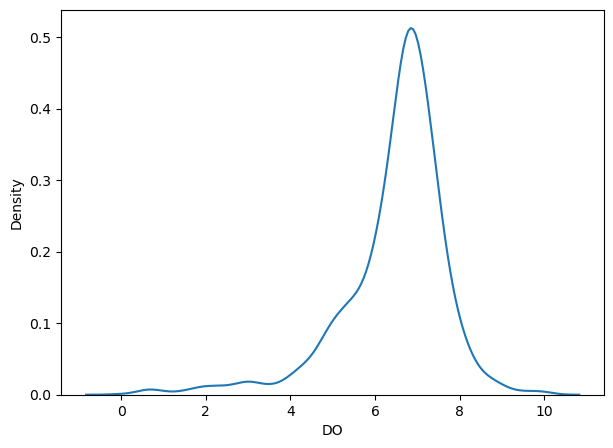

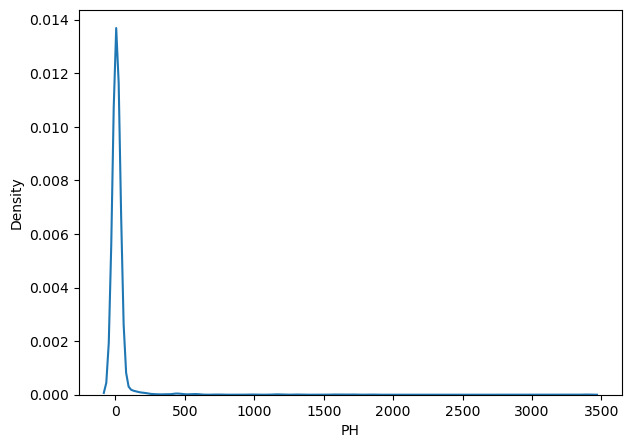

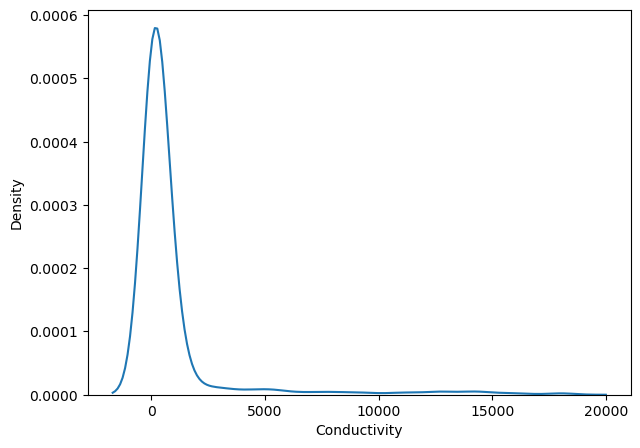

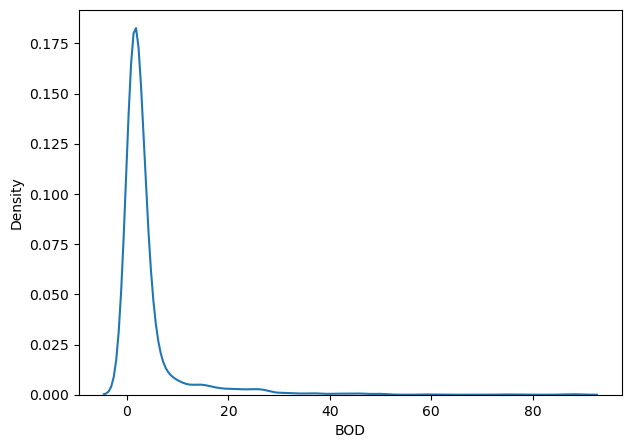

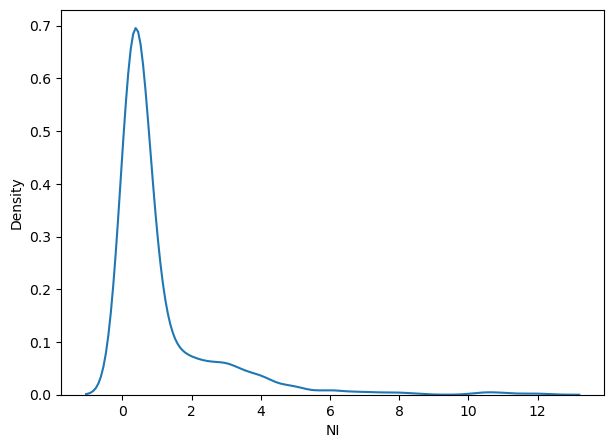

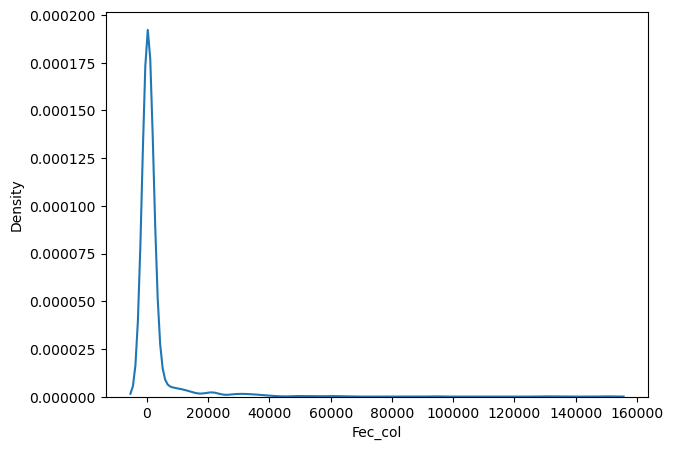

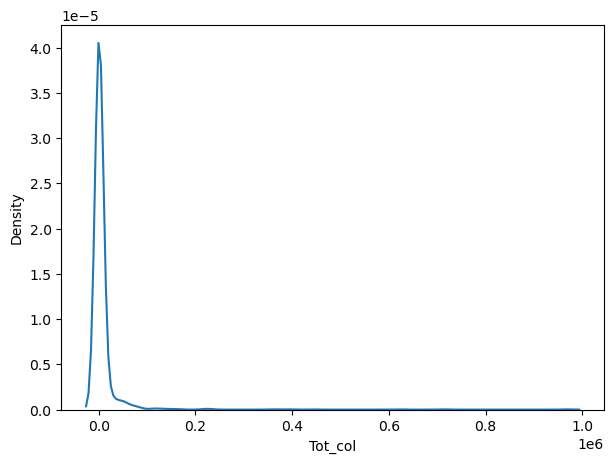

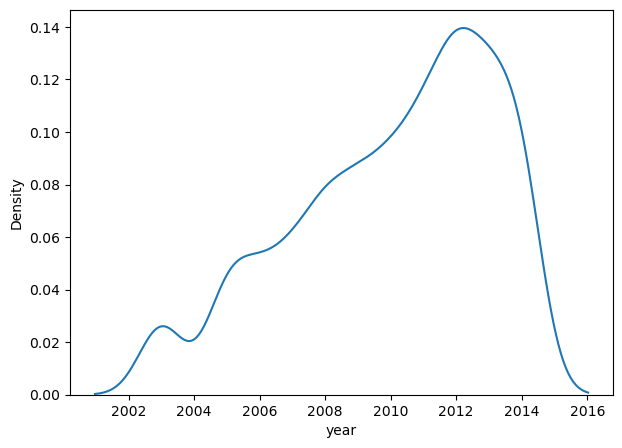

In [59]:
# KDE plots after removal of outliers
plot_kde(data_clean.select_dtypes(exclude="object"))

### FEATURE ENGINEERING FOR TARGET VARIABLE CREATION

### Water Quality Index Calculation

I will be using "Weighted Arithmetic Water Quality Index Method" to calculate WQI of each water sample. The formula to calculate WQI is -

WQI = ∑ qi × wi / ∑ wi

Here wi - Unit weight of ith parameter

 qi - Quality estimate scale of each parameter, it is calculated with the formula - 

qi = 100 × ( Vi − VIdeal / Si − VIdeal )

Here Vi - Measured value of ith parameter

Videal - Ideal value of ith parameter in pure water

Si - Standard value recommended for ith parameter

wi is calculated by the formula -

wi = K / Si

Here K is proportionality constant which is -

K = 1 / ∑ Si



Standard value recommended for parameters (Si) -

Dissolved oxygen, mg/L 10

pH 8.5

Conductivity, µS/cm 1000

Biological oxygen demand, mg/L 5

Nitrate, mg/L 45

Fecal coliform/100 mL 100

Total coliform/100 mL 1000


Values of unit weights for each parameter (wi) -

Dissolved Oxygen 0.2213

pH 0.2604

Conductivity 0.0022

Biological Oxygen Demand 0.4426

Nitrate 0.0492

Fecal Coliform 0.0221

Total Coliform 0.0022



Ideal value of parameters (Videal) -

Dissolved Oxygen 14.6

pH 7.0

Conductivity 0

Biological Oxygen Demand 0

Nitrate 0

Fecal Coliform 0

Total Coliform 0


In [60]:
# Calculating Water Quality Index of each sample
df_num_final = data_clean.select_dtypes(exclude="object")
# Dropping year and Temp attribute because they are not used for computing WQI
df_num_final.drop(["year", "Temp"], axis=1, inplace=True)

# Weight Vector(wi)
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 100, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0, 0])

def calc_wqi(sample):
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [61]:
# Computing WQI for the whole dataset
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [62]:
wqi_arr = calc_wqi_for_df(df_num_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
data_clean = data_clean.reset_index()

In [63]:
wqi_arr_df

,index,WQI
0,0,63.778321
1,1,175.363506
2,2,126.135831
3,3,195.105659
4,4,141.393246
...,...,...
1857,1857,12746.407333
1858,1858,10091.343432
1859,1859,1629.125767
1860,1860,1508.008186


In [64]:
data_clean

,index,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year
0,0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0
2,2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0
4,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0
1858,1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0
1859,1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0
1860,1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0


In [65]:
# Combining dataframe of WQI and dataframe of attributes 
df_wqi = pd.concat([data_clean, wqi_arr_df], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape



(1862, 13)

In [66]:
df_wqi

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0,63.778321
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0,175.363506
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0,126.135831
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0,195.105659
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0,141.393246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0,12746.407333
1858,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0,10091.343432
1859,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0,1629.125767
1860,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0,1508.008186


### task  10

What are the statistical properties of each variable?

In [67]:
df_wqi.describe()

,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000
mean,26.243414,6.470459,21.391149,914.274560,3.901351,1.091084,2157.399943,6974.150913,2010.067669,373.008553
std,3.236175,1.246170,125.697450,2554.122951,6.993561,1.578783,8085.575387,39355.379681,3.044138,2187.137257
min,10.000000,0.000000,0.000000,3.700000,0.100000,0.000000,0.000000,0.000000,2003.000000,-65.334452
25%,25.000000,6.000000,6.900000,76.000000,1.100000,0.270000,37.000000,112.250000,2008.000000,55.211945
50%,27.000000,6.700000,7.300000,169.150000,1.800000,0.516000,221.000000,468.000000,2011.000000,71.740150
75%,28.200000,7.200000,7.700000,446.000000,3.400000,1.017500,580.250000,1628.750000,2013.000000,101.601333
max,35.000000,10.000000,3384.000000,18291.000000,88.000000,12.150000,150250.000000,967500.000000,2014.000000,58680.748613


In [68]:
df_wqi.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,1862.0,26.243414,3.236175,10.000000,25.000000,27.00000,28.200000,35.000000
DO,1862.0,6.470459,1.246170,0.000000,6.000000,6.70000,7.200000,10.000000
PH,1862.0,21.391149,125.697450,0.000000,6.900000,7.30000,7.700000,3384.000000
Conductivity,1862.0,914.274560,2554.122951,3.700000,76.000000,169.15000,446.000000,18291.000000
BOD,1862.0,3.901351,6.993561,0.100000,1.100000,1.80000,3.400000,88.000000
NI,1862.0,1.091084,1.578783,0.000000,0.270000,0.51600,1.017500,12.150000
Fec_col,1862.0,2157.399943,8085.575387,0.000000,37.000000,221.00000,580.250000,150250.000000
Tot_col,1862.0,6974.150913,39355.379681,0.000000,112.250000,468.00000,1628.750000,967500.000000
year,1862.0,2010.067669,3.044138,2003.000000,2008.000000,2011.00000,2013.000000,2014.000000
WQI,1862.0,373.008553,2187.137257,-65.334452,55.211945,71.74015,101.601333,58680.748613


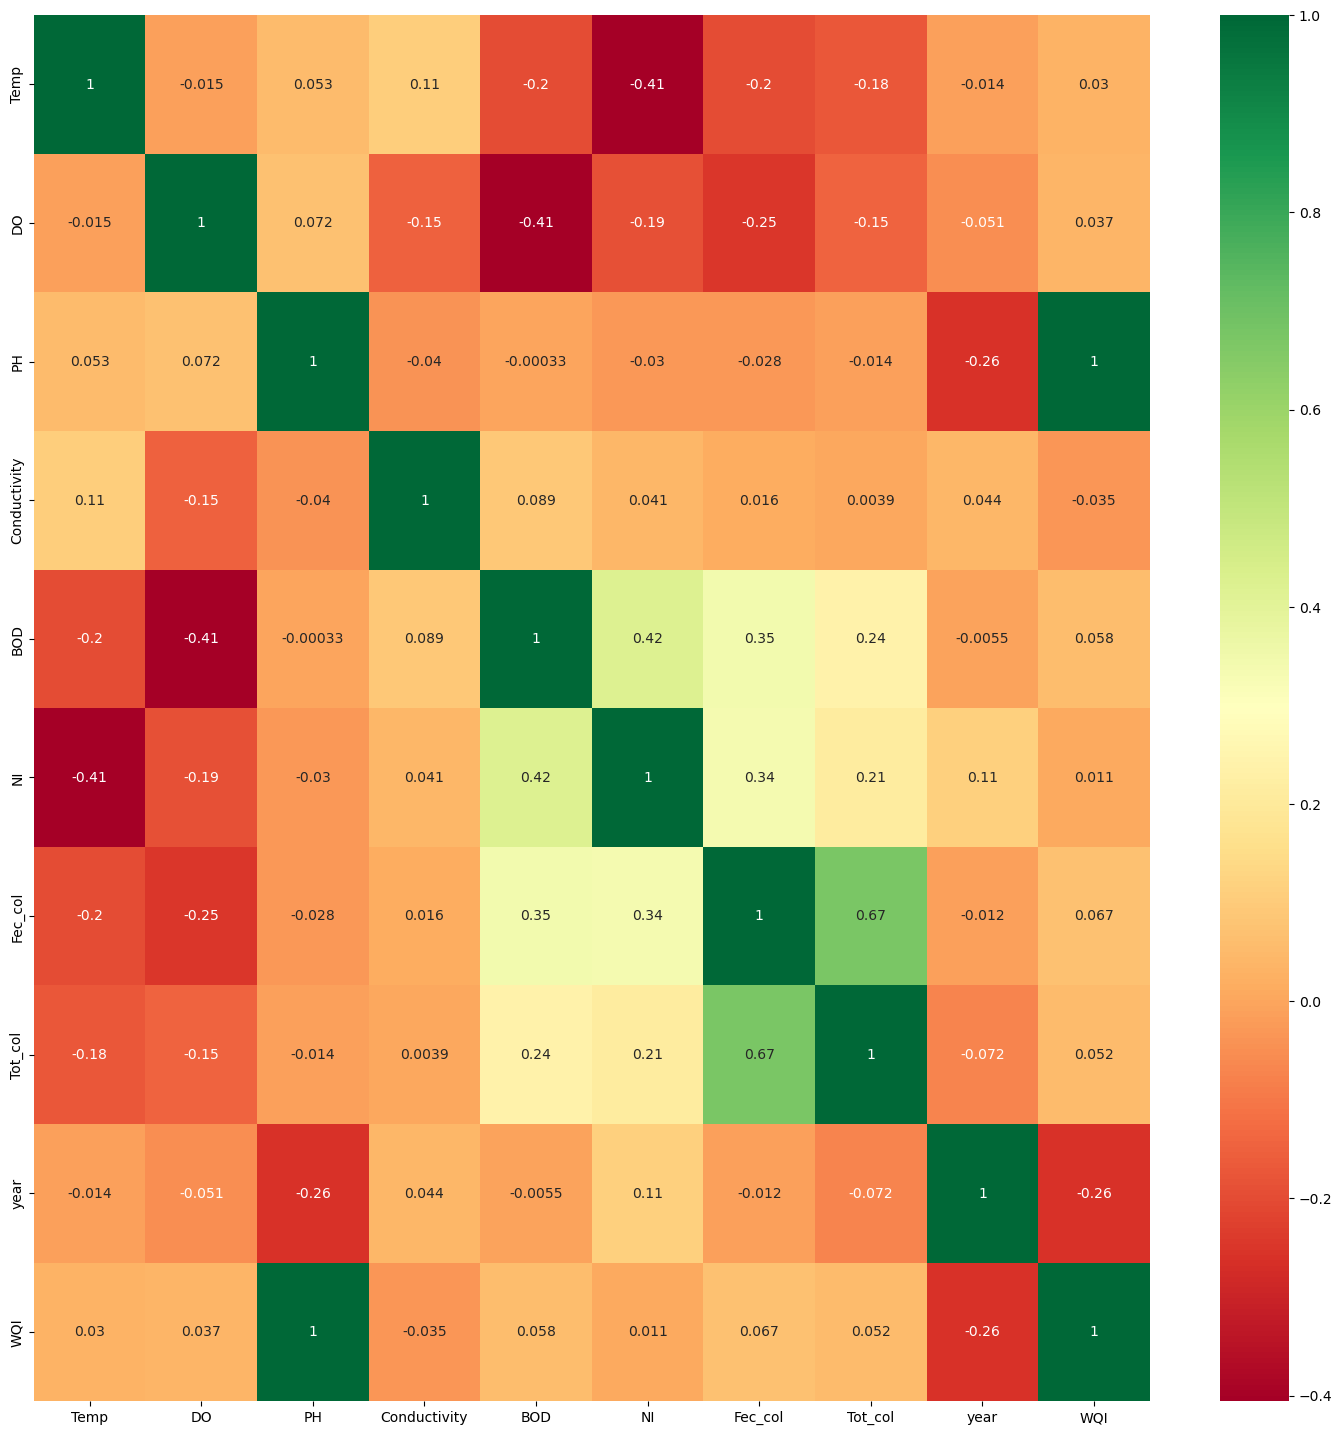

In [69]:
# Finds correlation between Independent and dependent attributes using heatmap

plt.figure(figsize = (18,18))
sns.heatmap(df_wqi.corr(), annot = True, cmap = "RdYlGn")

plt.show()